In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import os

In [2]:
#calculation of multiple linear regression with intercept subtraction for all clocks - the best model!
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

def substract_age(file_path):
    data = pd.read_csv(file_path)
    data_1 = data.copy()

    data_1['Condition'] = data_1['Condition'].apply(lambda x: 0 if x == 'HC' else 1)
    
    for site in data_1.columns[1:-3]:
        y_train = data_1[site] 
        
        X_train = data_1[['Age', 'Condition']] 

        model = LinearRegression()
        model.fit(X_train, y_train)
        
        age_coef = model.coef_[0] # Coefficient b1
        intercept = model.intercept_
        data_1[site] = data_1[site] - (age_coef * data_1['Age'] + intercept)
        
    data_1["Condition"] = data["Condition"]
    
    return data_1

datasets = '/tank/projects/vpalagina_hobotnica/hobotnica/clocks/a_new_set_for_checks/new_clock_dataset'
PhenoAge_mult_regr_age = '/tank/projects/vpalagina_hobotnica/hobotnica/clocks/a_new_set_for_checks/no_age'

for filename in os.listdir(datasets):
    file_path = os.path.join(datasets, filename)
    processed_df = substract_age(file_path)               
    output_path = os.path.join(PhenoAge_mult_regr_age, filename)
    processed_df.to_csv(output_path, index=False)


In [3]:
file1_path = '/tank/projects/vpalagina_hobotnica/hobotnica/clocks/GrimAgeV1/info_on_ds.csv' 
file2_path = '/tank/projects/vpalagina_hobotnica/hobotnica/clocks/a_new_set_for_checks/new_clock_h_scores.csv'
df1 = pd.read_csv(file1_path)
df1 = df1.rename(columns={"Dataset ID": "Dataset_ID"})
df2 = pd.read_csv(file2_path)
df2["H_score_no_Age"] = df2.H_score_no_Age.round(3)
final_df = pd.merge(df1, df2, on="Dataset_ID", how='outer')
final_df = final_df.sort_values('p_value_no_Age', ascending = True)
final_df.to_csv('/tank/projects/vpalagina_hobotnica/hobotnica/clocks/a_new_set_for_checks/final_res.csv', index=False)


In [52]:
#Parcing of txt file with information about number of methilation sites in each datasets for GrimAgeV2 samples:
file_path = "/tank/projects/vpalagina_hobotnica/hobotnica/clocks/Zhang19_EN/sum_of_sites.txt"
with open(file_path, 'r') as file:
    lines = file.readlines()
    
data = []
for line in lines:
    parts = line.split()
    if len(parts) == 7 and parts[0].startswith('GSE') and parts[-1].isdigit():
        gse_name = parts[0].split('_')[0]
        sum_of_sites = int(parts[-1])
        data.append([gse_name, sum_of_sites])

df = pd.DataFrame(data, columns=['GSE Name', 'Sum of Sites'])
df = df.drop_duplicates(subset="GSE Name")
df = df.rename(columns={"GSE Name":"Dataset ID"})

df2 = pd.read_csv("/tank/projects/vpalagina_hobotnica/hobotnica/ds_info_for_res.csv")

merged_df = pd.merge(df2, df, on='Dataset ID')
merged_df.to_csv('/tank/projects/vpalagina_hobotnica/hobotnica/clocks/Zhang19_EN/info_on_ds.csv', index=False)


In [3]:
import os
import shutil

source_parent_folder = '/tank/projects/vpalagina_hobotnica/hobotnica/clocks'
target_folder = '/tank/projects/vpalagina_hobotnica/hobotnica/clocks_results'

for folder_name in os.listdir(source_parent_folder):
    folder_path = os.path.join(source_parent_folder, folder_name)
    source_file = os.path.join(folder_path, 'final_res.csv')
    
    if os.path.isfile(source_file): 
        new_file_name = f"{folder_name}_final_res.csv"
        destination_path = os.path.join(target_folder, new_file_name)
        
        # Copy and rename the file
        shutil.copy(source_file, destination_path)
        print(f"Copied and renamed {source_file} to {destination_path}")
    else:
        print(f"'final_res.csv' not found in {folder_path}")

Copied and renamed /tank/projects/vpalagina_hobotnica/hobotnica/clocks/Hannum/final_res.csv to /tank/projects/vpalagina_hobotnica/hobotnica/clocks_results/Hannum_final_res.csv
Copied and renamed /tank/projects/vpalagina_hobotnica/hobotnica/clocks/GrimAgeV2/final_res.csv to /tank/projects/vpalagina_hobotnica/hobotnica/clocks_results/GrimAgeV2_final_res.csv
Copied and renamed /tank/projects/vpalagina_hobotnica/hobotnica/clocks/VidalBralo/final_res.csv to /tank/projects/vpalagina_hobotnica/hobotnica/clocks_results/VidalBralo_final_res.csv
Copied and renamed /tank/projects/vpalagina_hobotnica/hobotnica/clocks/Lin/final_res.csv to /tank/projects/vpalagina_hobotnica/hobotnica/clocks_results/Lin_final_res.csv
Copied and renamed /tank/projects/vpalagina_hobotnica/hobotnica/clocks/YingAdaptAge/final_res.csv to /tank/projects/vpalagina_hobotnica/hobotnica/clocks_results/YingAdaptAge_final_res.csv
'final_res.csv' not found in /tank/projects/vpalagina_hobotnica/hobotnica/clocks/clocks_sum_results.

In [25]:
import os
import pandas as pd

folder_path = '/tank/projects/vpalagina_hobotnica/hobotnica/clocks_results'

combined_df_initial = pd.DataFrame()

for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        model_name = file.split('_')[0]
        file_path = os.path.join(folder_path, file)
        model_df = pd.read_csv(file_path, usecols=['Dataset_ID', 'H_score', 'p_value'])
        
        model_df.rename(columns={
            'H_score': f'{model_name}_H_score_no_Age',
            'p_value': f'{model_name}_p_value_no_Age'
        }, inplace=True)
        
        if 'Dataset_ID' in model_df.columns:
            model_df.set_index('Dataset_ID', inplace=True)
            
        if combined_df_initial.empty:
            combined_df_initial = model_df
        else:
            combined_df_initial = combined_df_initial.join(model_df, how='outer')
            
combined_df_initial = combined_df_initial.applymap(lambda x: np.ceil(x * 1000) / 1000)

combined_df_initial.to_csv("/tank/projects/vpalagina_hobotnica/hobotnica/clocks/combined_df_initial.csv")


/tmp/ipykernel_2348796/1668252214.py:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  combined_df_initial = combined_df_initial.applymap(lambda x: np.ceil(x * 1000) / 1000)


In [87]:
import pandas as pd

class_info_df = pd.read_csv('/tank/projects/vpalagina_hobotnica/hobotnica/ds_info_for_res2.csv')
model_performance_df = pd.read_csv('/tank/projects/vpalagina_hobotnica/hobotnica/clocks/combined_df_initial.csv')

model_performance_df['Class'] = class_info_df['Class'].values
p_value_threshold = 0.05

unique_classes = model_performance_df['Class'].unique()
class_counts = class_info_df['Class'].value_counts().to_dict()

significant_h_score_counts = {}


for i in range(1, len(model_performance_df.columns) - 2, 2): 
    h_score_column = model_performance_df.columns[i]  
    p_value_column = model_performance_df.columns[i + 1] 
    
    model_h_score_counts = {cls: 0 for cls in unique_classes}

    for cls in unique_classes:
        significant = (model_performance_df[p_value_column] < p_value_threshold) & (model_performance_df['Class'] == cls)
        h_score_count = significant.sum()
        model_h_score_counts[cls] = h_score_count
        
    model_name = h_score_column.split('_H_score')[0]  
    significant_h_score_counts[model_name] = model_h_score_counts

result_df = pd.DataFrame(significant_h_score_counts).T  # Transpose to get models as rows and classes as columns
result_df = result_df.reset_index().rename(columns={'index': 'Model'})

for cls in unique_classes:
    class_count = class_counts.get(cls, 0)  # Get the number of datasets in this class
    result_df = result_df.rename(columns={cls: f'{cls}, max={class_count}'})
    
result_df['Total, max = 41'] = result_df.iloc[:, 1:].sum(axis=1)
result_df_sorted = result_df.sort_values(by='Total, max = 41', ascending=False)
result_df_sorted.to_csv("/tank/projects/vpalagina_hobotnica/hobotnica/clocks/result_summary_for_classes_initial.csv", index=False)



In [97]:
df = pd.read_csv('/tank/projects/vpalagina_hobotnica/hobotnica/clocks/combined_df_initial.csv')
# df = pd.read_csv('/tank/projects/vpalagina_hobotnica/hobotnica/clocks/combined_df_initial.csv')

dataset_ids = df['Dataset_ID']
model_columns = [col for col in df.columns if '_H_score_no_Age' in col]

reshaped_df = pd.DataFrame(index=[col.replace('_H_score_no_Age', '') for col in model_columns])

for idx, dataset_id in enumerate(dataset_ids):
    reshaped_df[dataset_id] = df.loc[idx, model_columns].values
    
reshaped_df.to_csv("/tank/projects/vpalagina_hobotnica/hobotnica/clocks/result_for_boxplots_initial.csv", index=True)


In [10]:
import pandas as pd

df1 = pd.read_csv("/tank/projects/vpalagina_hobotnica/hobotnica/ds_info_for_res2.csv", index_col=0)
df2 = pd.read_csv("/tank/projects/vpalagina_hobotnica/hobotnica/clocks_result/H-scores_ds_perfomances/low_h_score(<0.5)_initial.csv", index_col=0)
df2= df2.rename(columns={'Dataset': 'Dataset_ID'})

common_columns = df1.columns.intersection(df2.columns)
combined_df = pd.merge(df1, df2, on=list(common_columns), how="inner")
combined_df = combined_df.sort_values(by='low_score_count', ascending=False)
print(combined_df)

combined_df.to_csv("/tank/projects/vpalagina_hobotnica/hobotnica/clocks_result/H-scores_ds_perfomances/initial_low_score_with_ds_info.csv")

   Dataset_ID Class Condition  n_samples  n_of_HC n_of_disease  \
6    GSE71841   MSD        RA         24       12           12   
19   GSE87640   ISD       IBD        240       84          156   
17   GSE56046   CVD        AS       1128      339          789   
3   GSE130029   NDD        MS         31       11           20   
20  GSE131989   MSD        RA        353      123          230   
23  GSE182991   PGS      HGPS         27       12           15   
27  GSE118468   RSD      COPD         21        6           15   
26  GSE118469   RSD        TB         18        6           12   
16  GSE111629   NDD        PD        572      237          335   
14   GSE72774   NDD        PD        508      219          289   
9    GSE56581   CVD        AS        199       66          133   
11   GSE49909   MBD       XOB         49       40            9   
24   GSE32148   ISD       IBD         46       19           27   
13   GSE56606   MBD       T1D         90       63           27   
2   GSE130

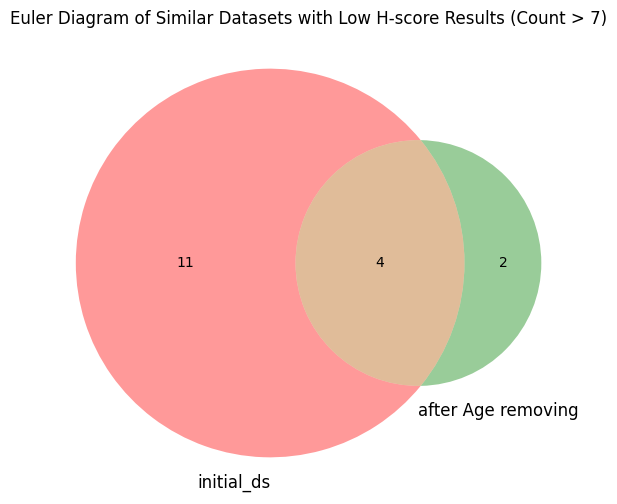

In [18]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

# Load the two dataframes
df1 = pd.read_csv("/tank/projects/vpalagina_hobotnica/hobotnica/clocks_result/H-scores_ds_perfomances/datasets_analysis/initial_low_score_with_ds_info.csv")
df2 = pd.read_csv("/tank/projects/vpalagina_hobotnica/hobotnica/clocks_result/H-scores_ds_perfomances/datasets_analysis/no_age_low_score_with_ds_info.csv")

# Filter to include only Dataset_IDs with low score count > 7
df1_filtered = df1[df1['low_score_count'] > 6]
df2_filtered = df2[df2['low_score_count'] > 6]

# Extract unique Dataset_IDs
dataset1_ids = set(df1_filtered['Dataset_ID'].unique())
dataset2_ids = set(df2_filtered['Dataset_ID'].unique())

# Plot the Venn diagram
plt.figure(figsize=(8, 6))
venn2([dataset1_ids, dataset2_ids], set_labels=('initial_ds', 'after Age removing'))

# Customize and display the plot
plt.title("Euler Diagram of Similar Datasets with Low H-score Results (Count > 7)")
plt.show()